# Predicting Chronic Kidney Disease based on health records
Given 24 health related attributes taken in 2-month period of 400 patients, using the information of the 158 patients with complete records to predict the outcome (i.e. whether one has chronic kidney disease) of the remaining 242 patients (with missing values in their records).



In [3]:
#Make necessary imports
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from pycaret.datasets import get_data

dataset = pd.read_csv("Kidney_Disease_Pre-Processed.csv").drop("Unnamed: 0",axis=1)
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,40,3,3,1,0,1,1,0,0,...,30,69,33,1,1,0,0,0,0,0
1,1,5,0,3,4,0,1,1,0,0,...,24,53,33,0,0,0,0,0,0,0
2,2,54,3,1,2,3,1,1,0,0,...,17,67,33,0,1,0,1,0,1,0
3,3,40,2,0,4,0,1,0,1,0,...,18,59,18,1,0,0,1,1,1,0
4,4,43,3,1,2,0,1,1,0,0,...,21,65,26,0,0,0,0,0,0,0


In [4]:
#check the shape of data
dataset.shape

(400, 26)

In [5]:
# creating the training data
data = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
# creating the test data
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (380, 26)
Unseen Data For Predictions: (20, 26)


In [6]:
# Setting up Environment in PyCaret
from pycaret.classification import *

In [7]:
exp_clf101 = setup(data = data, target = 'classification', session_id=123) 

,Description,Value
0,Session id,123
1,Target,classification
2,Target type,Binary
3,Original data shape,"(380, 26)"
4,Transformed data shape,"(380, 26)"
5,Transformed train set shape,"(266, 26)"
6,Transformed test set shape,"(114, 26)"
7,Numeric features,25
8,Preprocess,True
9,Imputation type,simple


In [8]:
exp_clf102 = setup(data = data, target = 'classification',pca=True,pca_components=0.95, session_id=124) 

,Description,Value
0,Session id,124
1,Target,classification
2,Target type,Binary
3,Original data shape,"(380, 26)"
4,Transformed data shape,"(380, 5)"
5,Transformed train set shape,"(266, 5)"
6,Transformed test set shape,"(114, 5)"
7,Numeric features,25
8,Preprocess,True
9,Imputation type,simple


In [9]:
# Comparing Model

compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0370
lr,Logistic Regression,0.9962,1.0000,1.0000,0.9909,0.9952,0.9920,0.9923,0.8760
knn,K Neighbors Classifier,0.9962,1.0000,1.0000,0.9909,0.9952,0.9920,0.9923,0.6090
dt,Decision Tree Classifier,0.9962,0.9969,1.0000,0.9909,0.9952,0.9920,0.9923,0.0090
rf,Random Forest Classifier,0.9962,1.0000,1.0000,0.9909,0.9952,0.9920,0.9923,0.0420
ada,Ada Boost Classifier,0.9962,0.9969,1.0000,0.9909,0.9952,0.9920,0.9923,0.0090
gbc,Gradient Boosting Classifier,0.9962,0.9969,1.0000,0.9909,0.9952,0.9920,0.9923,0.0210
xgboost,Extreme Gradient Boosting,0.9962,0.9969,1.0000,0.9909,0.9952,0.9920,0.9923,0.0180
lightgbm,Light Gradient Boosting Machine,0.9962,1.0000,1.0000,0.9909,0.9952,0.9920,0.9923,0.0620
nb,Naive Bayes,0.9887,1.0000,0.9889,0.9818,0.9846,0.9757,0.9766,0.0090


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=124, verbose=0,
                     warm_start=False)

In [10]:
# Create a Model

lda = create_model('lda') # from the table above, we can see that catboost works the

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9630,1.0000,1.0000,0.9091,0.9524,0.9222,0.9250
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9259,1.0000,1.0000,0.8333,0.9091,0.8475,0.8575
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8462,1.0000,1.0000,0.7143,0.8333,0.6977,0.7319
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [11]:
# Tune a Model

tuned_lda = tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9630,1.0000,1.0000,0.9091,0.9524,0.9222,0.9250
1,0.9630,1.0000,1.0000,0.9091,0.9524,0.9222,0.9250
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9630,1.0000,1.0000,0.9091,0.9524,0.9222,0.9250
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9231,1.0000,1.0000,0.8333,0.9091,0.8434,0.8539
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


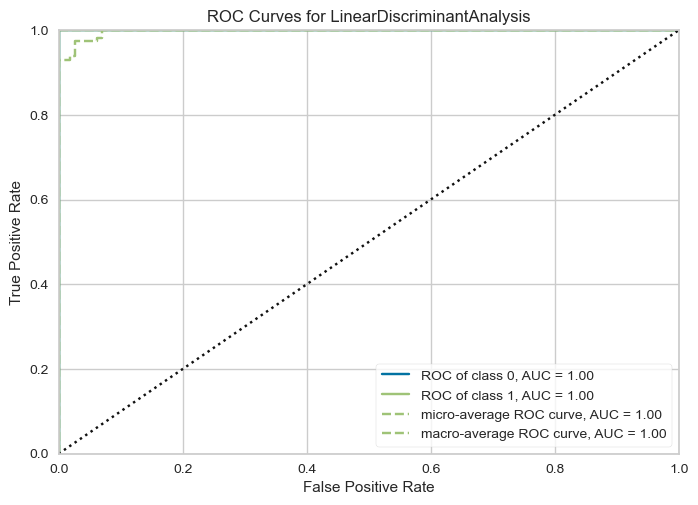

In [12]:
# Plotting Metrix
# ROC
plot_model(tuned_lda, plot = 'auc')

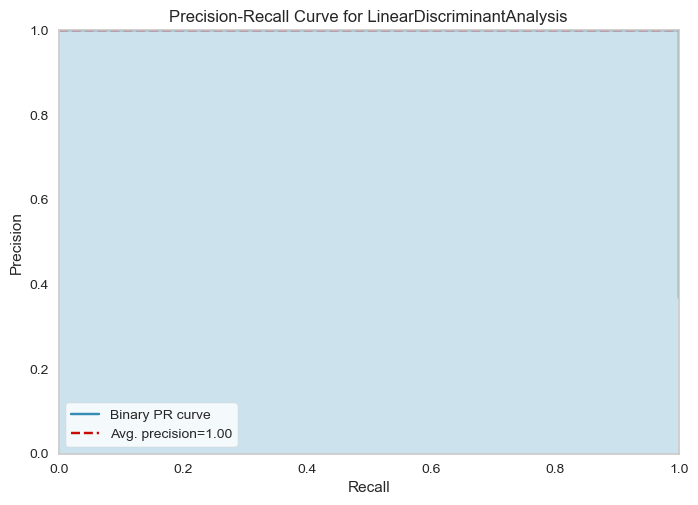

In [13]:
# Precision Recall curve
plot_model(tuned_lda, plot = 'pr')

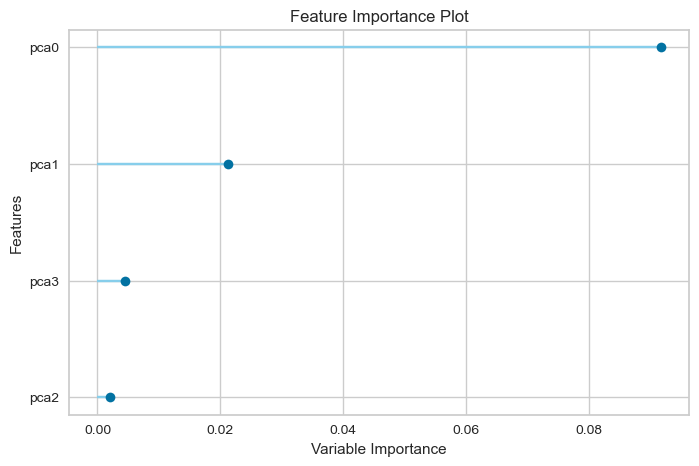

In [14]:
# Feature Importance Plot
plot_model(tuned_lda, plot='feature')

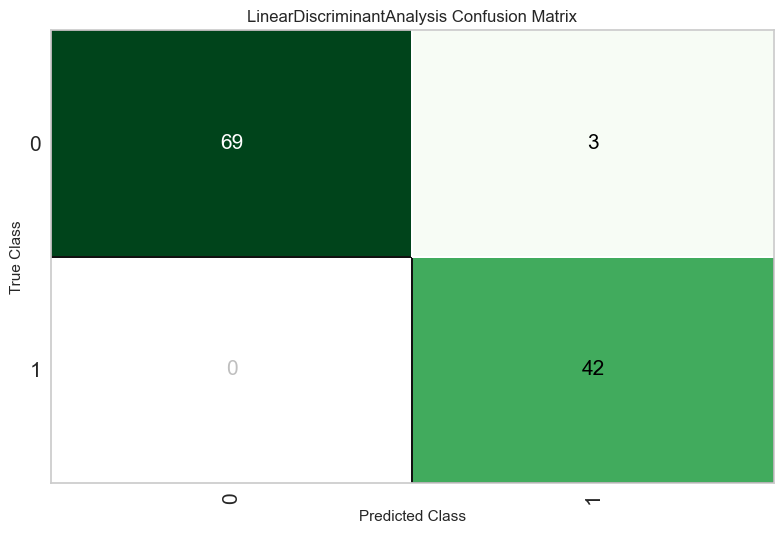

In [15]:
# Confusion Metrix

plot_model(tuned_lda, plot = 'confusion_matrix')

In [16]:
# Evaluate model

evaluate_model(tuned_lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [17]:
predict_model(tuned_lda)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.9737,1.0000,1.0000,0.9333,0.9655,0.9443,0.9458


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,rc,htn,dm,cad,appet,pe,ane,classification,prediction_label,prediction_score
302,33,52,5,3,2,0,0,0,0,0,...,33,1,0,0,1,0,0,0,0,1.0000
139,361,22,3,3,0,0,1,1,0,0,...,39,0,0,0,0,0,0,1,1,1.0000
89,186,6,0,3,4,0,1,1,0,0,...,33,0,0,0,0,1,0,0,0,0.9346
2,316,27,3,3,0,0,1,1,0,0,...,33,0,0,0,0,0,0,1,1,0.9999
307,359,66,1,3,0,0,1,1,0,0,...,25,0,0,0,0,0,0,1,1,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,198,51,5,3,4,2,1,1,0,0,...,18,1,1,0,1,1,0,0,0,0.9907
211,59,51,5,3,0,0,1,1,0,0,...,33,1,1,0,0,0,1,0,0,1.0000
325,2,54,3,1,2,3,1,1,0,0,...,33,0,1,0,1,0,1,0,0,1.0000
218,126,62,4,2,0,0,1,1,0,0,...,25,1,1,0,1,1,0,0,0,1.0000


In [18]:
# Predict on test data

unseen_predictions = predict_model(tuned_lda, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,1.0000,0,1.0000,1.0000,1.0000,nan,0.0000


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,rc,htn,dm,cad,appet,pe,ane,classification,prediction_label,prediction_score
0,380,51,1,3,0,0,1,1,0,0,...,29,0,0,0,0,0,0,1,1,1.0
1,381,63,2,4,0,0,1,1,0,0,...,40,0,0,0,0,0,0,1,1,1.0
2,382,40,3,4,0,0,1,1,0,0,...,46,0,0,0,0,0,0,1,1,1.0
3,383,71,3,4,0,0,1,1,0,0,...,31,0,0,0,0,0,0,1,1,1.0
4,384,49,1,3,0,0,1,1,0,0,...,25,0,0,0,0,0,0,1,1,1.0


In [19]:
# Save model

save_model(tuned_lda,'tuned_lda_Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['id', 'age', 'bp', 'sg', 'al',
                                              'su', 'rbc', 'pc', 'pcc', 'ba',
                                              'bgr', 'bu', 'sc', 'sod', 'pot',
                                              'hemo', 'pcv', 'wc', 'rc', 'htn',
                                              'dm', 'cad', 'appet', 'pe',
                                              'ane'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               miss...
                             